In [1]:
import sys
sys.path.append("..")

In [8]:
from math import nan
from pathlib import Path
from wandb_utils import Aggregation, Metrics, load_data, plot, simple_concat
from wandb_downloader import RunsDownloader

In [5]:
wandb = RunsDownloader(project="suds")

In [9]:
results_dir = Path("../../results/cmnist/3_digits/4miss/")

baselines = load_data(
    results_dir / "cmnist_baseline_dro_color_eta_0.5_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",
    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
)
ours = wandb.groups(
    "cmnist.SupportMatching.ranking-fdm.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss",
    "cmnist.SupportMatching.no-cluster-fdm.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss",
    "cmnist.SupportMatching.perfect-cluster.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss",
)
data = simple_concat(baselines, ours)

'cmnist.SupportMatching.ranking-fdm.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss': found 30 runs.
'cmnist.SupportMatching.no-cluster-fdm.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss': found 30 runs.
'cmnist.SupportMatching.perfect-cluster.s_as_zs_10k_3step_biasterm_gumbal.3dig_4miss': found 30 runs.


In [10]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 1.25),
    file_prefix="cmnist_3dig_4miss",
)

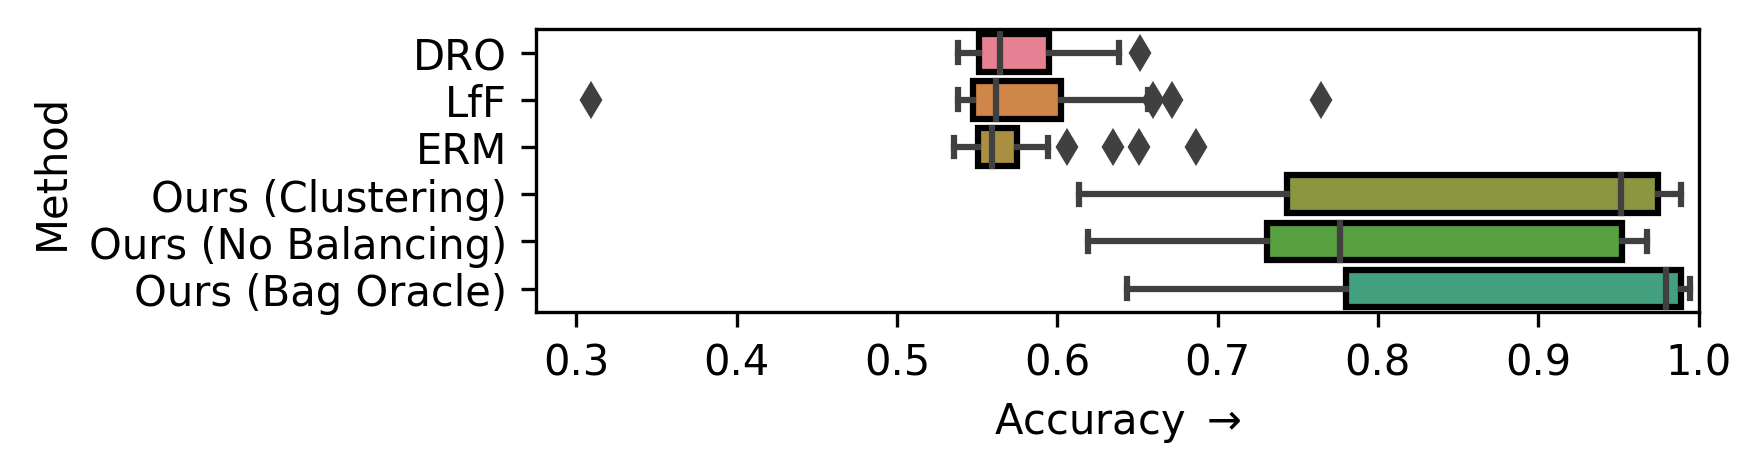

In [11]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, 1), **plot_kwargs)

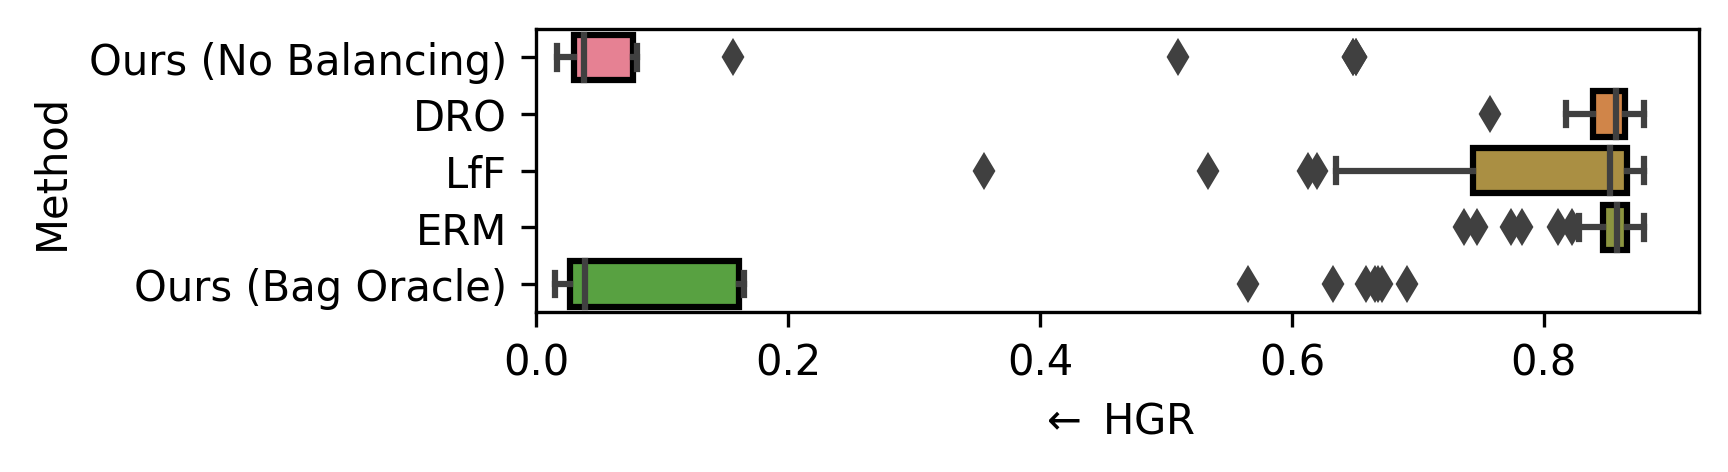

In [18]:
plot(data, metrics=[Metrics.hgr], x_limits=(0, nan), **plot_kwargs)

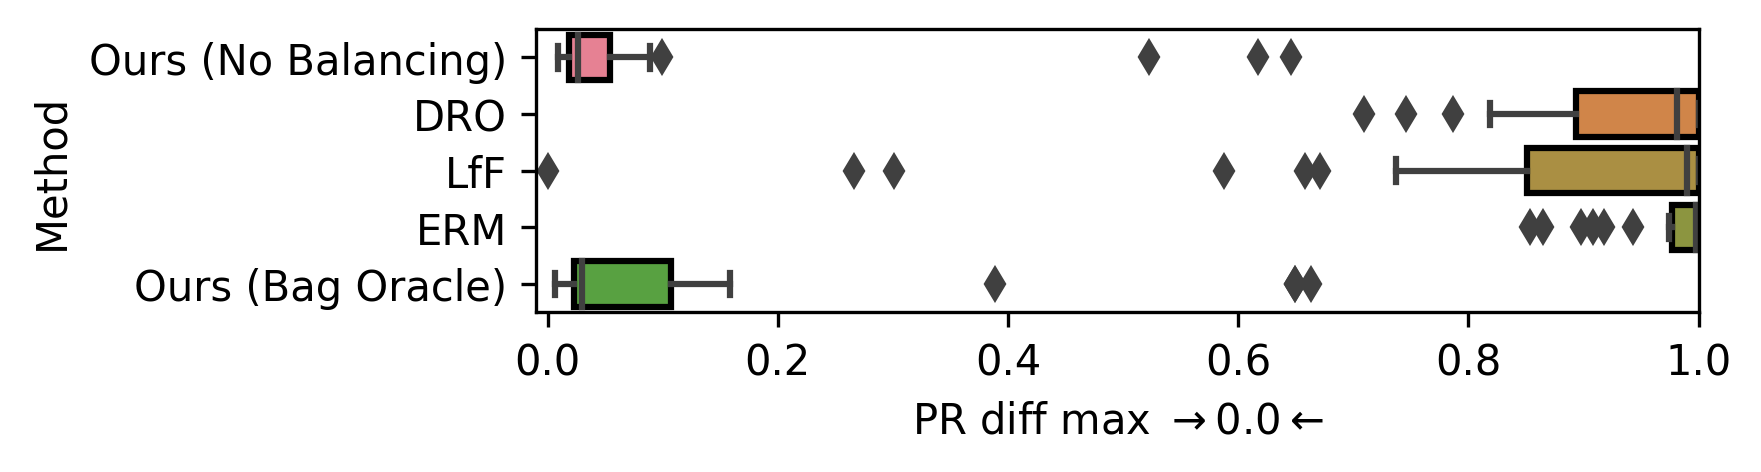

In [19]:
plot(data, metrics=[Metrics.prd], agg=Aggregation.max, x_limits=(-0.01, 1), **plot_kwargs)

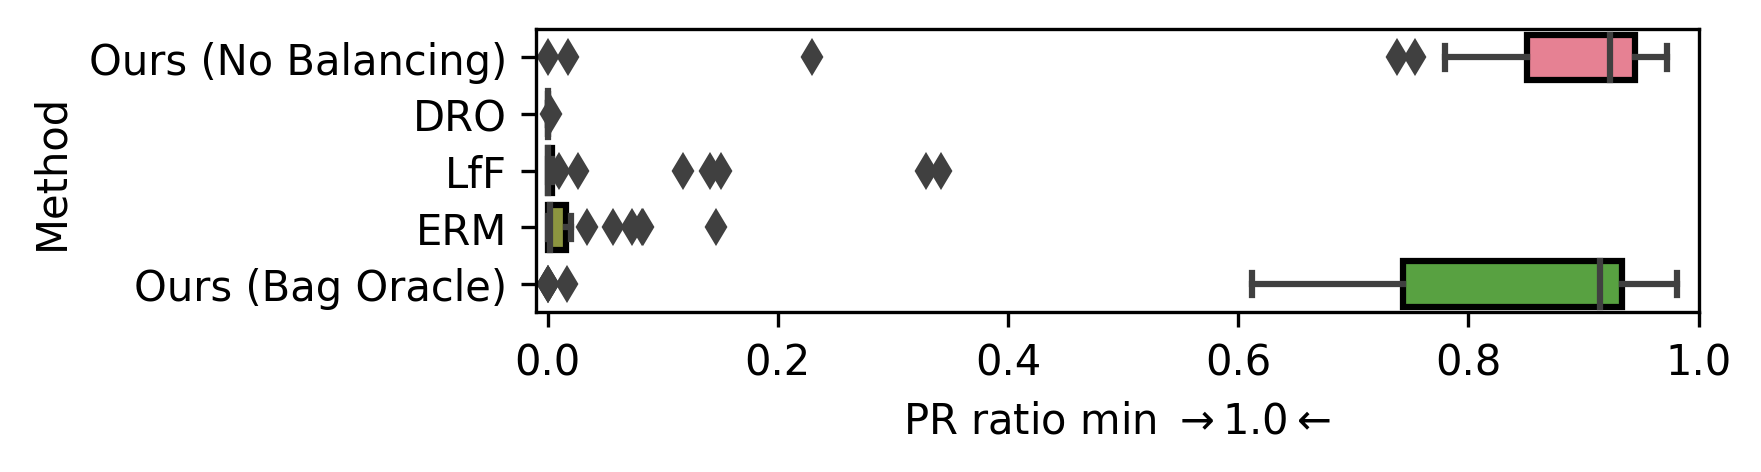

In [20]:
plot(data, metrics=[Metrics.prr], agg=Aggregation.min, x_limits=(-0.01, 1), **plot_kwargs)

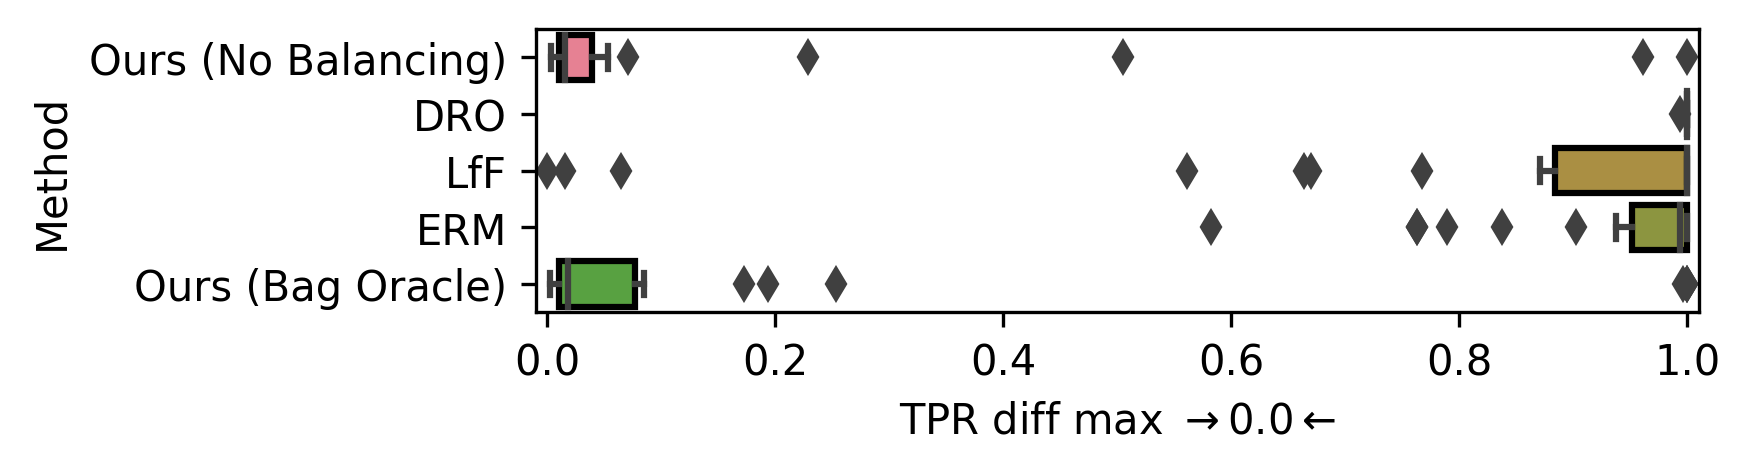

In [21]:
plot(data, metrics=[Metrics.tprd], agg=Aggregation.max, x_limits=(-0.01, 1.01), **plot_kwargs)

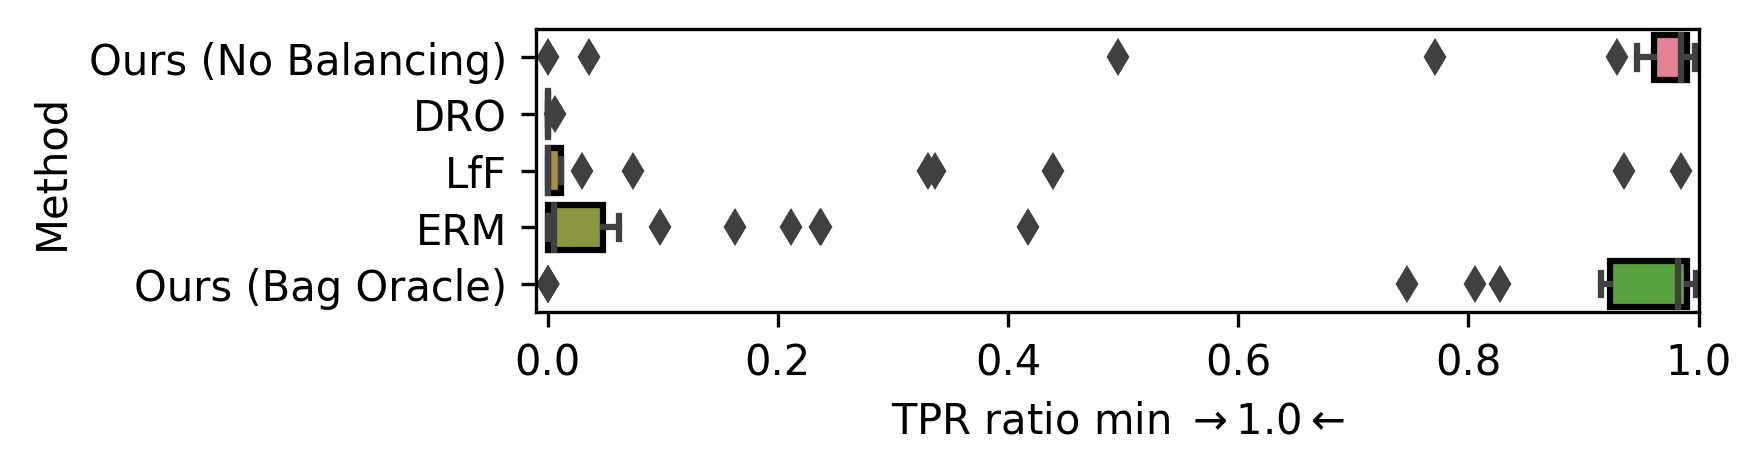

In [22]:
plot(data, metrics=[Metrics.tprr], agg=Aggregation.min, x_limits=(-0.01, 1), **plot_kwargs)

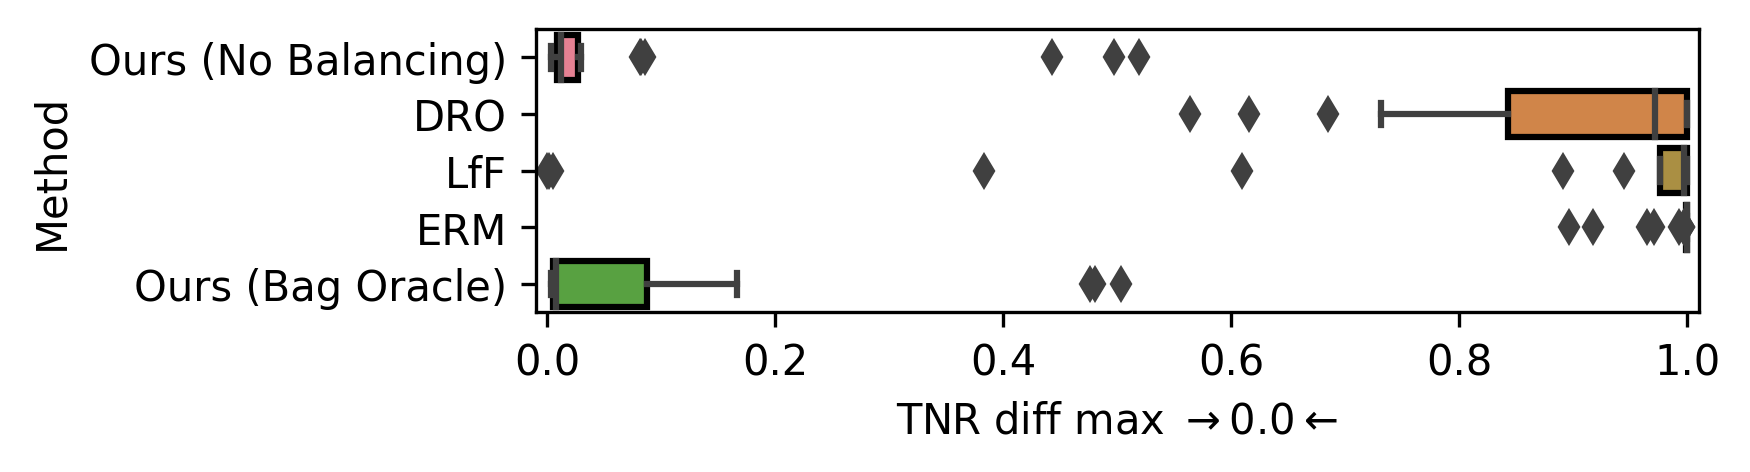

In [23]:
plot(data, metrics=[Metrics.tnrd], agg=Aggregation.max, x_limits=(-0.01, 1.01), **plot_kwargs)

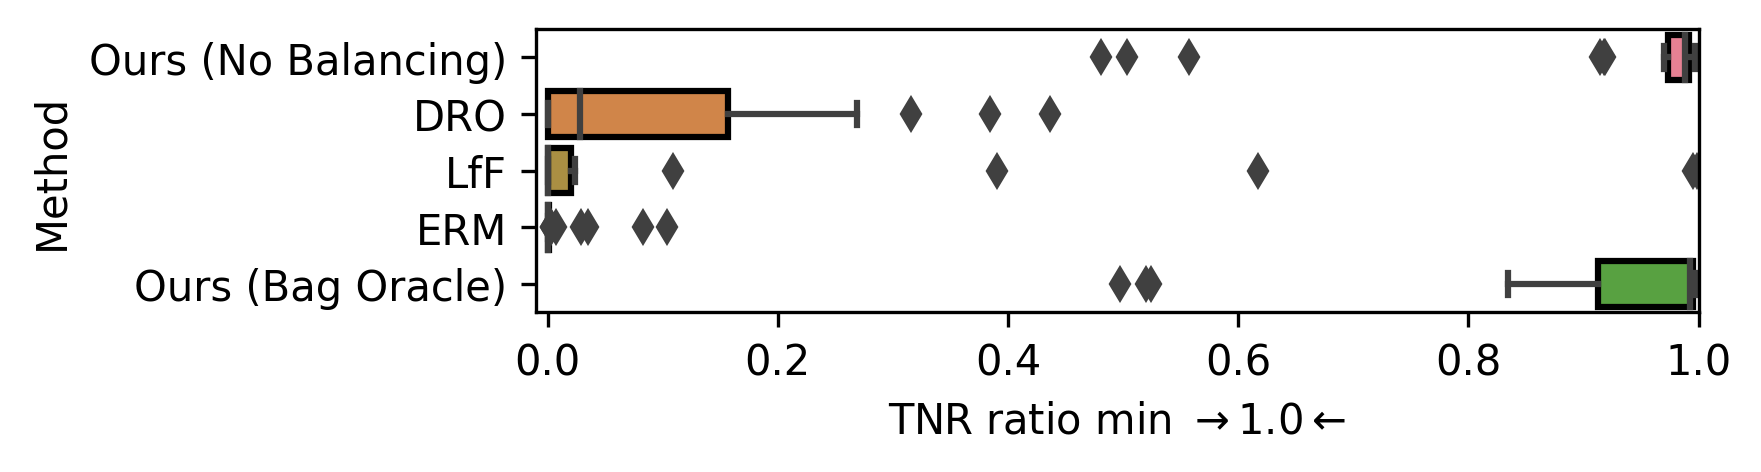

In [24]:
plot(data, metrics=[Metrics.tnrr], agg=Aggregation.min, x_limits=(-0.01, 1), **plot_kwargs)